In [1]:
import numpy as np
from matplotlib import pyplot as plt
import figurefirst as fifi

In [2]:
from IPython.display import display,SVG

In [3]:
%matplotlib inline

In [19]:
txt_data = """11/18 up 500 down 645
11/19 up 445 down 9 up 1120 down 715
11/20 up 545 down 1030 up 1145 down 645
11/21 up 630 down 1015 up 12 down 645
11/22 up 630 down 1030 up 1115 down 730
11/23 up 530 down 1045 up 110 down 730
11/24 up 1 down 115 up 530 down 1030 up 110 down 715
11/25 up 515 down 1045 up 1215 down 730 up 1030 down 11
11/26 up 6 down 10 up 1115 down 715
11/27 up 6 down 10 up 11 down 7 
11/28 up 230 down 245 up 430 down 830 up 10 down 2 up 4 down 8
11/29 up 4 down 9 up 10 down 2 up 3 down 8
11/30 up 430 down 920 up 1030 down 130 up 3 down 815
12/01 up 430 down 920 up 10 down 2 up 345 down 745
12/02 up 545 down 1215 up 2 down 745
12/03 up 350 down 9 up 11 down 4 up 6 down 930
12/04 up 455 down 835 up 1050 down 4 up 535 down 9 
12/05 up 645 down 1030 up 1230 down 730
12/06 up 545 down 9 up 1010 down 135 up 240 down 7
12/07 up 530 down 9 up 10 down 1 up 2 down 7
12/08 up 600 down 1020 up 1150 down 715
12/09 up 615 down 1030 up 1220 down 630
12/10 up 615 down 930 up 1040 down 6
12/11 up 500 down 1000 up 1230 down 630 
12/12 up 400 down 500 up 730 down 9 up 10 down 230 up 330 down 730
12/13 up 545 down 9 up 1025 down 140 up 210 down 700
12/14 up 600 down 10 up 1215 down 6
12/15 up 515 down 1020 up 1200 down 650 
12/16 up 130 down 330 up 530 down 1030 up 1245 down 630
12/17 up 530 down 10 up 1145 down 615
12/18 up 530 down 10 up 1130 down 9
12/19 up 600 down 945 up 110 down 630
12/20 up 530 down 945 up 12 down 600
12/21 up 415 down 830 up 11 down 240 up 340 down 630
12/22 up 500 down 1000 up 1200 down 815
12/23 up 500 down 945 up 1200 down 630
12/24 up 500 down 830 up 1000 down 3 up 335 down 830
12/25 up 500 down 900 up 11 down 600
12/26 up 600 down 1130 up 200 down 700
12/27 up 430 down 10 up 1040 down 2 up 4 down 8
12/28 up 430 down 815 up 1030 down 6
12/29 up 415 down 1030 up 12 down 630
12/30 up 515 down 11 up 1230 down 7
12/31 up 600 down 1115 up 135 down 7
01/01 up 445 down 1030 up 1230 down 7
01/02 up 445 down 1119 up 200 down 8"""

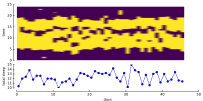

In [20]:
layout = fifi.FigureLayout('raster_layout.svg',make_mplfigures=True)

#layout.axes.keys()

decode= {1:lambda s:float(s)+0.00,
         2:lambda s:float(s)+0.00,
         3:lambda s:float(s[0])+float(s[1:])/60.,
         4:lambda s:float(s[:2])+float(s[2:])/60.}

days = txt_data.split('\n')

parsed_data = []
for day in days:
    parsed_day = day.split()
    pairs = [[x,y] for x,y in zip(parsed_day[1::2],parsed_day[2::2])]
    decoded = np.array([decode[len(pair[1])](pair[1]) for pair in pairs])
    ampm = np.where(np.diff(decoded)<0)
    if np.sum(ampm) > 0:
        pmidx = ampm[0][0]
        decoded[pmidx+1:] += 12.0
    else:
        decoded[1:] += 12.0
    for pair,dc in zip(pairs,decoded):
        pair[1] = dc
    parsed_data.append(pairs)

times = np.linspace(0,24,120)
raster = np.zeros((len(parsed_data),len(times)))

for i,row in enumerate(parsed_data):
    for samp in row:
        mask = times>=samp[1]
        if samp[0] == 'up':
            raster[i,mask] = 1
        else:
            raster[i,mask] = 0

layout.axes['total_time'].plot(np.arange(0,len(parsed_data))+0.5,
                    np.sum(-1*(raster-1),axis = 1)*24/120.,'-o')
layout.axes['total_time'].set_xbound(0,len(parsed_data))
layout.axes['total_time'].set_xlabel('days')
layout.axes['total_time'].set_ylabel('total sleep')
layout.axes['raster'].set_ylabel('time')
layout.axes['raster'].imshow(raster.T,interpolation = None,
           extent = (0,len(parsed_data),0,24),
           aspect = 'auto',
           cmap = plt.cm.viridis)

fifi.mpl_functions.set_spines(layout)

layout.axes['raster'].set_xbound(0,layout.axes['total_time']['axis'].get_xbound()[1])
layout.save('raster.svg')
plt.close('all')
display(SVG('raster.svg'))